# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [2]:
df_pca = pd.read_csv("DNS_Data_PySINDy.csv")
df_pca

,y^+,U,u'u',v'v',w'w',u'v',P,k,dU/dy,y/delta,Re_tau,u_tau,nu
0,0.000000,0.000000,4.176503e-36,0.000000,-4.685007e-10,0.000000,0.000000,-2.342503e-10,1.000000,0.000000,5185.897,0.041487,0.000008
1,0.518124,0.518066,5.631775e-02,0.000016,2.217542e-02,-0.000197,-0.000016,3.925471e-02,0.999702,0.000100,5185.897,0.041487,0.000008
2,1.036249,1.035755,2.146491e-01,0.000173,7.611461e-02,-0.001431,-0.000173,1.454683e-01,0.998367,0.000200,5185.897,0.041487,0.000008
3,1.554373,1.552302,4.703307e-01,0.000694,1.508211e-01,-0.004692,-0.000695,3.109228e-01,0.995003,0.000300,5185.897,0.041487,0.000008
4,2.072498,2.066162,8.257437e-01,0.001886,2.396174e-01,-0.011195,-0.001888,5.336234e-01,0.988395,0.000400,5185.897,0.041487,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,180.486137,18.268216,6.365826e-01,0.378819,3.800729e-01,-0.008124,-0.378819,6.977371e-01,0.000670,0.991201,182.088,0.063731,0.000350
49996,180.504194,18.268239,6.365619e-01,0.378816,3.800658e-01,-0.008032,-0.378816,6.977216e-01,0.000662,0.991300,182.088,0.063731,0.000350
49997,180.522252,18.268262,6.365412e-01,0.378813,3.800587e-01,-0.007940,-0.378813,6.977062e-01,0.000655,0.991400,182.088,0.063731,0.000350
49998,180.540310,18.268285,6.365206e-01,0.378809,3.800516e-01,-0.007849,-0.378809,6.976908e-01,0.000647,0.991499,182.088,0.063731,0.000350


In [3]:
# Define the variables to be used for the PCA
pca_va = ["u'u'","v'v'","w'w'","u'v'"]

# Create a dataframe from these variables of the main dataframe
df_pca_g = df_pca[pca_va]
df_pca_g

,u'u',v'v',w'w',u'v'
0,4.176503e-36,0.000000,-4.685007e-10,0.000000
1,5.631775e-02,0.000016,2.217542e-02,-0.000197
2,2.146491e-01,0.000173,7.611461e-02,-0.001431
3,4.703307e-01,0.000694,1.508211e-01,-0.004692
4,8.257437e-01,0.001886,2.396174e-01,-0.011195
...,...,...,...,...
49995,6.365826e-01,0.378819,3.800729e-01,-0.008124
49996,6.365619e-01,0.378816,3.800658e-01,-0.008032
49997,6.365412e-01,0.378813,3.800587e-01,-0.007940
49998,6.365206e-01,0.378809,3.800516e-01,-0.007849


### Standardisation of data because the PCA is sensitive to the scale of the variables
##### After standardising the data, each variable in the dataset will have a mean of 0 and a standard deviation of 1

In [4]:
# Initialise a StandardScaler to standardise the DNS data
scaler = StandardScaler()

# Fit and transform the data
data_std = scaler.fit_transform(df_pca_g)

# Create a dataframe from the standardised DNS data
df_pca_g = pd.DataFrame(data_std, columns=df_pca_g.columns)

df_pca_g

,u'u',v'v',w'w',u'v'
0,-1.518265,-2.573974,-2.012925,1.737380
1,-1.481563,-2.573915,-1.968387,1.736643
2,-1.378379,-2.573343,-1.860053,1.732037
3,-1.211752,-2.571441,-1.710009,1.719866
4,-0.980131,-2.567091,-1.531667,1.695596
...,...,...,...,...
49995,-1.103406,-1.191116,-1.249570,1.707058
49996,-1.103420,-1.191128,-1.249584,1.707400
49997,-1.103433,-1.191139,-1.249599,1.707742
49998,-1.103447,-1.191150,-1.249613,1.708084


# PCA

In [5]:
# Initialise the PCA object
cls = PCA(n_components=2)

# Fit and transform the PCA on the scaled data
pcs = cls.fit_transform(df_pca_g)

cls.components_

array([[ 0.4546596 ,  0.47374578,  0.53536282, -0.5312591 ],
       [ 0.74893479, -0.66139817, -0.01238196,  0.03867596]])

In [6]:
# Display the ratio of variance explained for each principal component
cls.explained_variance_ratio_
inertia = (cls.explained_variance_ratio_).round(2)
inertia

array([0.85, 0.13])

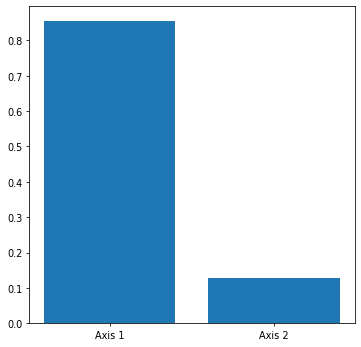

In [7]:
# Plot the ratio of variance explained for the first two principal components
plt.figure(figsize=(6,6), dpi=70)
plt.bar(["Axis 1", "Axis 2"],cls.explained_variance_ratio_)
plt.show()

In [8]:
def correlation_graph(pca, x_y, features) : 
    """
    Displays the correlation graph.
    
    Args:
        pca (sklearn.decomposition.PCA): The PCA object which has been fit
        x_y (tuple): The indices of the principal components to plot 
        features (list): The list of features to represent
    
    Returns:
        None
    """

    # Extract x and y
    x,y=x_y

    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component :
    for i in range(0, pca.components_.shape[1]):

        # Arrows
        #ax.arrow(0,0, 
                #pca.components_[x, i],  
                #pca.components_[y, i],  
                #head_width=0.07,
                #head_length=0.07, 
                #width=0.02 )

        # Labels
        plt.text(pca.components_[x, i] - 0.15 ,
                pca.components_[y, i] + 0.1,
                features[i])
        
    # Display of horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Name of axes, with percentage of inertia explained
    plt.xlabel('Axis{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('Axis{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("correlation circle (Axis{} and Axis{})".format(x+1, y+1))

    # The circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes and display
    plt.axis('equal')
    plt.show(block=False)

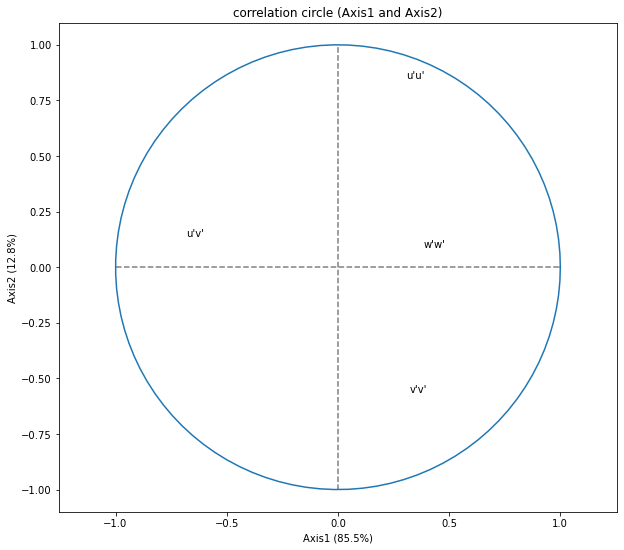

In [9]:
# Specify the PCA components to visualize
x_y = (0,1)
correlation_graph(cls,x_y,df_pca_g.columns)

In [10]:
# Create a dataframe with the PCA components and merge them with other DNS data
df_PCA = pd.DataFrame(data = pcs,columns=['PC1', 'PC2'])
df_PCA["U"] = df_pca["U"]
df_PCA["y^+"] = df_pca["y^+"]
df_PCA["Re_tau"] = df_pca["Re_tau"] 
df_PCA["P"] = df_pca["P"]
df_PCA["dU/dy"] = df_pca["dU/dy"]
df_PCA = df_PCA[["y^+","Re_tau","U","PC1","PC2","P","dU/dy"]]
df_PCA

,y^+,Re_tau,U,PC1,PC2,P,dU/dy
0,0.000000,5185.897,0.000000,-3.910347,0.657459,0.000000,1.000000
1,0.518124,5185.897,0.518066,-3.869397,0.684328,-0.000016,0.999702
2,1.036249,5185.897,1.035755,-3.761768,0.759708,-0.000173,0.998367
3,1.554373,5185.897,1.552302,-3.598314,0.880914,-0.000695,0.995003
4,2.072498,5185.897,2.066162,-3.382573,1.048359,-0.001888,0.988395
...,...,...,...,...,...,...,...
49995,180.486137,182.088,18.268216,-2.641824,0.042917,-0.378819,0.000670
49996,180.504194,182.088,18.268239,-2.642025,0.042928,-0.378816,0.000662
49997,180.522252,182.088,18.268262,-2.642226,0.042939,-0.378813,0.000655
49998,180.540310,182.088,18.268285,-2.642427,0.042949,-0.378809,0.000647


In [11]:
df_PCA.to_csv("DNS_Data_PCA_PySINDy.csv", index=False)